# QCTO - Workplace Module

### Project Title: Analysing Veggie Prices
#### Done By: Ruben Juries

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** This project focuses on analyzing Vegetable pricing data to uncover trends and insights. The analysis includes data cleaning, filtering, and exploratory data analysis (EDA). Insights gained from this analysis can help in understanding the vegetable market and predicting future trends.

* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.
---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [1]:
%pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Install seaborn in the current Jupyter environment (magic command)
%pip install seaborn




In [3]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Please use code cells to code in and do not forget to comment your code.
# Install missing package (run in this notebook cell)
%pip install seaborn

In [2]:
# Imports (no duplicates)
from sqlalchemy import create_engine, text  # SQL interface
import pandas as pd  # Importing the Pandas package with an alias, pd
import matplotlib.pyplot as plt
import sys, seaborn as sns
print(sys.executable, sns.__version__, sns.__file__)
import re  # regex package for data cleaning

c:\Users\juriesru\.conda\envs\myenv\python.exe 0.13.2 c:\Users\juriesru\.conda\envs\myenv\lib\site-packages\seaborn\__init__.py


---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** The dataset used in this project is sourced from Kaggle's Vegetable Prices dataset. It contains data on 10 types of vegetable prices over a period of a year.

* **Details:** The data was collected from the dataset repositories.Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical). The vegetable types are bhindi_ladies_finger, tomato, onion, potato, brinjal, garlic, peas, methi, green_chilli, elephant_yam_suran.
 
* **Data Fields:**
- `Price Dates`: The date of the price observation.
- `Type`: The type of vegetable.


---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** The data is loaded into a Pandas DataFrame for easy manipulation:
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [3]:
#Please use code cells to code in and do not forget to comment your code.
df = pd.read_csv("prices.csv")
df.head()

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25


In [4]:
#Display the last 5 rows of the dataframe
df.tail()


,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
282,27-12-2023,45.0,16,30.0,20,70,260,40,16,40.0,25
283,28-12-2023,45.0,16,30.0,20,70,260,30,20,45.0,25
284,29-12-2023,45.0,16,30.0,22,80,260,30,18,50.0,25
285,31-12-2023,45.0,16,26.0,20,60,250,40,16,50.0,40
286,01-01-2024,45.0,16,9.0,18,50,260,40,15,60.0,25


In [4]:
df.info() # Using this function to provide a concise summary of our data and to check for null entries.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price Dates             287 non-null    object 
 1   Bhindi (Ladies finger)  287 non-null    float64
 2   Tomato                  287 non-null    int64  
 3   Onion                   287 non-null    float64
 4   Potato                  287 non-null    int64  
 5   Brinjal                 287 non-null    int64  
 6   Garlic                  287 non-null    int64  
 7   Peas                    287 non-null    int64  
 8   Methi                   287 non-null    int64  
 9   Green Chilli            287 non-null    float64
 10  Elephant Yam (Suran)    287 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 24.8+ KB


In [5]:
print(df.columns)


Index(['Price Dates', 'Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato',
       'Brinjal', 'Garlic', 'Peas', 'Methi', 'Green Chilli',
       'Elephant Yam (Suran)'],
      dtype='object')


In [6]:
print (df['Price Dates'])

0      01-01-2023
1      02-01-2023
2      03-01-2023
3      04-01-2023
4      08-01-2023
          ...    
282    27-12-2023
283    28-12-2023
284    29-12-2023
285    31-12-2023
286    01-01-2024
Name: Price Dates, Length: 287, dtype: object


In [7]:
df.describe() # Using the describe function to view summary statistics on our data in order to have an overview.

,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,29.444251,16.006969,20.649826,18.585366,31.655052,133.101045,66.658537,20.383275,44.122404,28.797909
std,8.124815,0.118056,11.711204,2.726238,11.725421,60.078331,33.302415,117.428417,12.796590,6.607973
min,17.000000,16.000000,8.000000,12.000000,14.000000,50.000000,22.000000,5.000000,0.130000,12.000000
25%,22.000000,16.000000,12.000000,16.000000,25.000000,85.000000,40.000000,8.000000,35.000000,25.000000
50%,27.500000,16.000000,16.000000,20.000000,30.000000,120.000000,60.000000,12.000000,40.000000,30.000000
75%,33.000000,16.000000,25.000000,20.000000,35.000000,165.000000,80.000000,16.000000,50.000000,30.000000
max,60.000000,18.000000,57.000000,24.000000,80.000000,290.000000,150.000000,2000.000000,90.000000,50.000000


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** This DataFrame will be used for all subsequent analysis.

---

In [8]:
#Please use code cells to code in and do not forget to comment your code.
#Please use code cells to code in and do not forget to comment your code.
''' This code will take the headings from dataframe and convert them into PEP 8 compliant headings and then replace the dataframe headings'''

def pep8_compliant_column_names(df):
    """
    Convert DataFrame column names to PEP 8 compliant names.
    
    Parameters:
    df (pd.DataFrame): The DataFrame with column names to convert.
    
    Returns:
    pd.DataFrame: DataFrame with updated column names.
    """
    def convert_to_pep8(name):
        # Replace spaces with underscores
        name = re.sub(r'\s+', '_', name)
        # Insert underscores between adjacent capitalized words
        name = re.sub(r'(?<=[a-z])(?=[A-Z])', '_', name)
        # Convert to lowercase
        name = name.lower()
        # Remove any non-alphanumeric characters except underscores
        name = re.sub(r'[^\w_]', '', name)
        # Replace multiple underscores with a single underscore
        name = re.sub(r'_+', '_', name)
        return name

    # Apply PEP 8 compliance to each column name
    new_columns = [convert_to_pep8(col) for col in df.columns]
    
    # Set the new column names
    df.columns = new_columns
    
    return df

In [9]:
df = pep8_compliant_column_names(df)
print(df.head())

  price_dates  bhindi_ladies_finger  tomato  onion  potato  brinjal  garlic  \
0  01-01-2023                  35.0      18   22.0      20       30      50   
1  02-01-2023                  35.0      16   22.0      20       30      55   
2  03-01-2023                  35.0      16   21.0      20       30      55   
3  04-01-2023                  30.0      16   21.0      22       25      55   
4  08-01-2023                  35.0      16   20.0      21       25      55   

   peas  methi  green_chilli  elephant_yam_suran  
0    25      8          45.0                  25  
1    25      7          40.0                  25  
2    25      7          40.0                  25  
3    25      7          40.0                  25  
4    22      6          35.0                  25  


In [10]:
df.isnull().sum # Checking for missing values

<bound method DataFrame.sum of      price_dates  bhindi_ladies_finger  tomato  onion  potato  brinjal  \
0          False                 False   False  False   False    False   
1          False                 False   False  False   False    False   
2          False                 False   False  False   False    False   
3          False                 False   False  False   False    False   
4          False                 False   False  False   False    False   
..           ...                   ...     ...    ...     ...      ...   
282        False                 False   False  False   False    False   
283        False                 False   False  False   False    False   
284        False                 False   False  False   False    False   
285        False                 False   False  False   False    False   
286        False                 False   False  False   False    False   

     garlic   peas  methi  green_chilli  elephant_yam_suran  
0     False  False

In [11]:
# Find and display the number of null values in each column
null_values = df.isnull().sum()
print("\nNull Values in Each Column:")
print(null_values)

# Display the total number of missing values in the dataset
total_missing = df.isnull().sum().sum()
print(f"\nTotal Missing Values in the Dataset: {total_missing}")

# Exclude rows with any null values
data_cleaned = df.dropna()

# Display the first few rows of the cleaned dataset
print("\nCleaned Dataset:")
print(data_cleaned.head())

# Display the number of rows and columns in the original and cleaned datasets
print(f"\nOriginal Dataset Shape: {df.shape}")
print(f"Cleaned Dataset Shape: {data_cleaned.shape}")


Null Values in Each Column:
price_dates             0
bhindi_ladies_finger    0
tomato                  0
onion                   0
potato                  0
brinjal                 0
garlic                  0
peas                    0
methi                   0
green_chilli            0
elephant_yam_suran      0
dtype: int64

Total Missing Values in the Dataset: 0

Cleaned Dataset:
  price_dates  bhindi_ladies_finger  tomato  onion  potato  brinjal  garlic  \
0  01-01-2023                  35.0      18   22.0      20       30      50   
1  02-01-2023                  35.0      16   22.0      20       30      55   
2  03-01-2023                  35.0      16   21.0      20       30      55   
3  04-01-2023                  30.0      16   21.0      22       25      55   
4  08-01-2023                  35.0      16   20.0      21       25      55   

   peas  methi  green_chilli  elephant_yam_suran  
0    25      8          45.0                  25  
1    25      7          40.0         

In [12]:
import pandas as pd

df = pd.DataFrame(df)

# Find unique values in each column
unique_counts = df.nunique()

print(unique_counts)


price_dates             287
bhindi_ladies_finger     34
tomato                    2
onion                    42
potato                   12
brinjal                  13
garlic                   22
peas                     24
methi                    21
green_chilli             16
elephant_yam_suran       12
dtype: int64


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


In [13]:
#Let's check the column names again to ensure they are PEP 8 compliant
df.columns

Index(['price_dates', 'bhindi_ladies_finger', 'tomato', 'onion', 'potato',
       'brinjal', 'garlic', 'peas', 'methi', 'green_chilli',
       'elephant_yam_suran'],
      dtype='object')

In [14]:
# Strip whitespace from column names
# This will remove any leading or trailing whitespace from the column names
# Ensuring that column names are clean and consistent, especially after data import.

df.columns = df.columns.str.strip()
print(df.columns)
print(df.columns.duplicated())
print(df.head())


Index(['price_dates', 'bhindi_ladies_finger', 'tomato', 'onion', 'potato',
       'brinjal', 'garlic', 'peas', 'methi', 'green_chilli',
       'elephant_yam_suran'],
      dtype='object')
[False False False False False False False False False False False]
  price_dates  bhindi_ladies_finger  tomato  onion  potato  brinjal  garlic  \
0  01-01-2023                  35.0      18   22.0      20       30      50   
1  02-01-2023                  35.0      16   22.0      20       30      55   
2  03-01-2023                  35.0      16   21.0      20       30      55   
3  04-01-2023                  30.0      16   21.0      22       25      55   
4  08-01-2023                  35.0      16   20.0      21       25      55   

   peas  methi  green_chilli  elephant_yam_suran  
0    25      8          45.0                  25  
1    25      7          40.0                  25  
2    25      7          40.0                  25  
3    25      7          40.0                  25  
4    22      6

In [15]:
# Convert 'price_dates' to datetime format
# This will ensure that the date column is in a proper datetime format for analysis
df['price_dates'] = pd.to_datetime(df['price_dates'], format='%d-%m-%Y')
df.set_index('price_dates', inplace=True)


In [16]:
# Display the first few rows of the DataFrame to verify the changes
print(df.head())

             bhindi_ladies_finger  tomato  onion  potato  brinjal  garlic  \
price_dates                                                                 
2023-01-01                   35.0      18   22.0      20       30      50   
2023-01-02                   35.0      16   22.0      20       30      55   
2023-01-03                   35.0      16   21.0      20       30      55   
2023-01-04                   30.0      16   21.0      22       25      55   
2023-01-08                   35.0      16   20.0      21       25      55   

             peas  methi  green_chilli  elephant_yam_suran  
price_dates                                                 
2023-01-01     25      8          45.0                  25  
2023-01-02     25      7          40.0                  25  
2023-01-03     25      7          40.0                  25  
2023-01-04     25      7          40.0                  25  
2023-01-08     22      6          35.0                  25  


In [ ]:
##Hypothesis: Most of these vegetables have a significant increase in prices over time
# Null hypothesis: There is no significant increase in the prices of most of these vegetables over time.


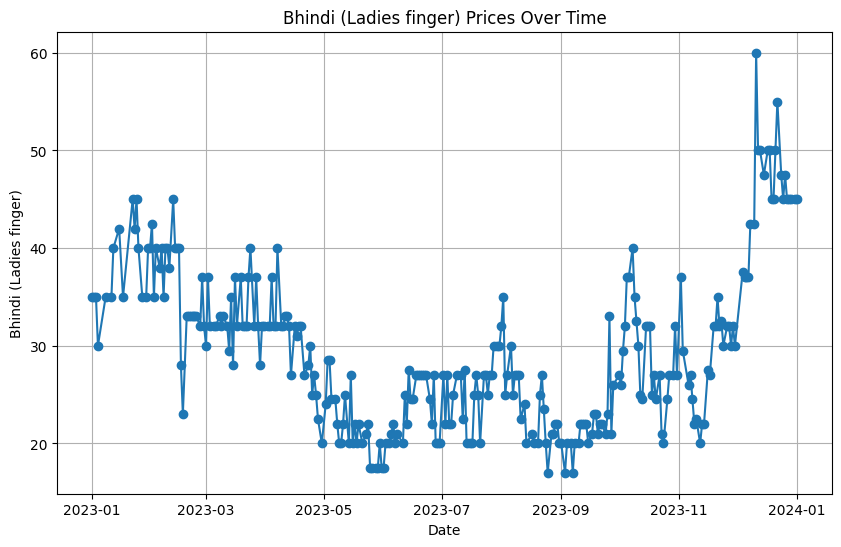

In [17]:
#Try code for running line graph with all the features
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'price_dates' to datetime format with the correct format


# Plot the time series line graph
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['bhindi_ladies_finger'], marker='o')
plt.title('Bhindi (Ladies finger) Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Bhindi (Ladies finger)')
plt.grid(True)
plt.show()





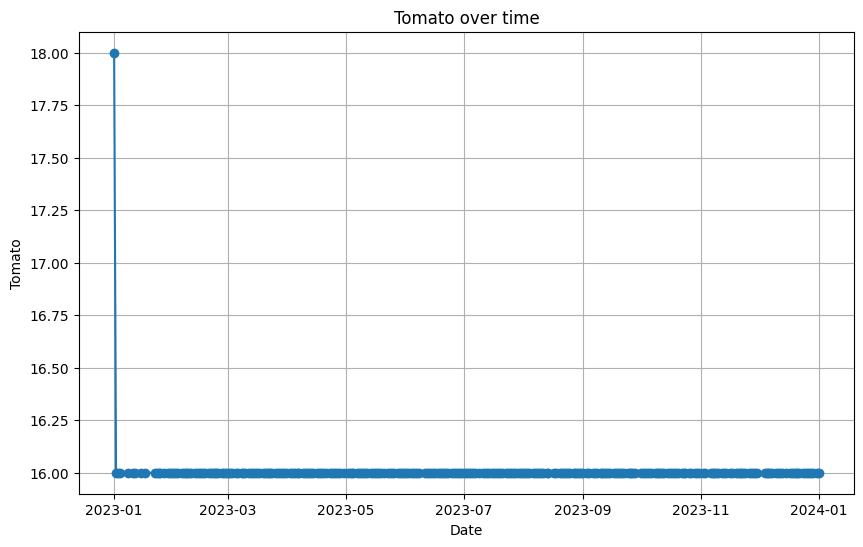

In [18]:
#Please use code cells to code in and do not forget to comment your code.
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'price_dates' to datetime format with the correct format
# Plot the time series line graph
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['tomato'], marker='o')
plt.title('Tomato over time')
plt.xlabel('Date')
plt.ylabel('Tomato')
plt.grid(True)
plt.show()


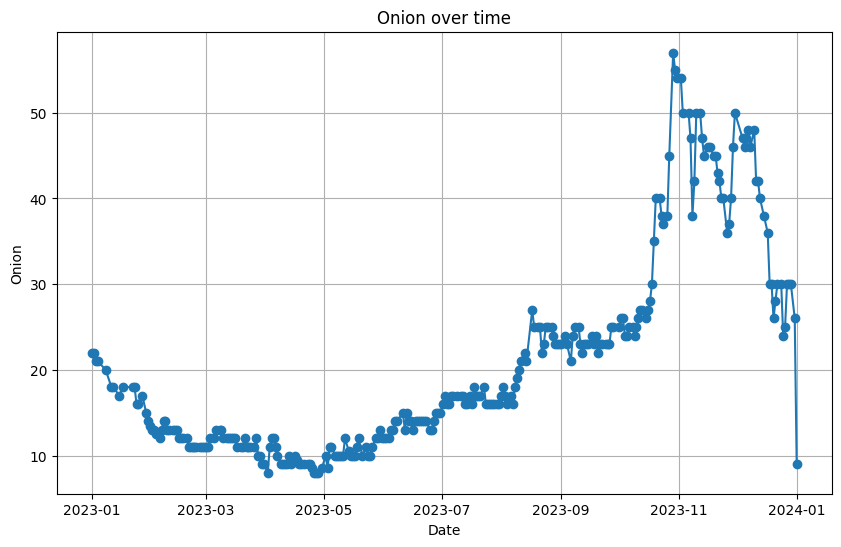

In [19]:
# Convert 'price_dates' to datetime format with the correct format
# Plot the time series line graph
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['onion'], marker='o')
plt.title('Onion over time')
plt.xlabel('Date')
plt.ylabel('Onion')
plt.grid(True)
plt.show()

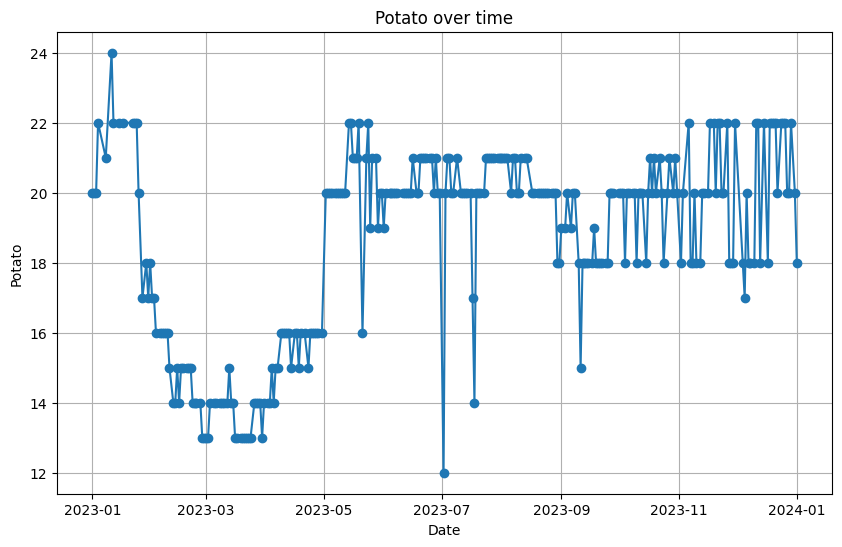

In [20]:
# Convert 'price_dates' to datetime format with the correct format
# Plot the time series line graph
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['potato'], marker='o')
plt.title('Potato over time')
plt.xlabel('Date')
plt.ylabel('Potato')
plt.grid(True)
plt.show()

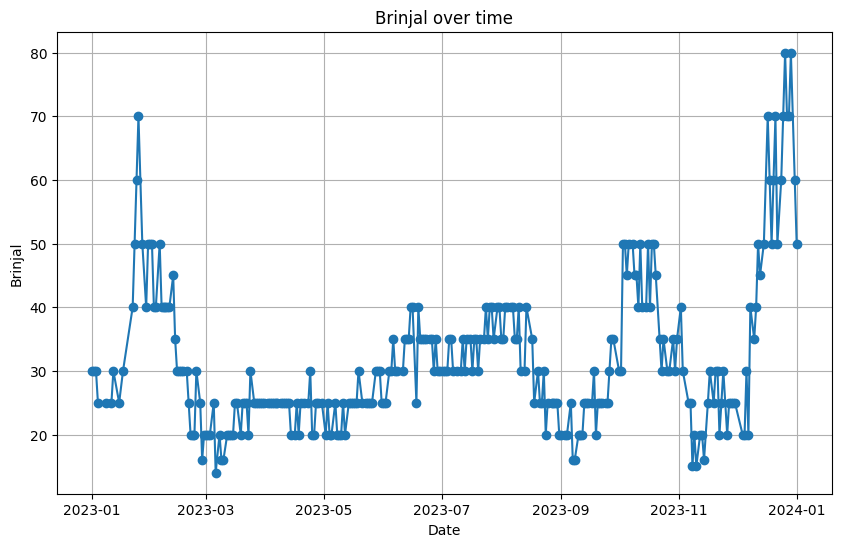

In [21]:
# Convert 'price_dates' to datetime format with the correct format
# Plot the time series line graph
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['brinjal'], marker='o')
plt.title('Brinjal over time')
plt.xlabel('Date')
plt.ylabel('Brinjal')
plt.grid(True)
plt.show()

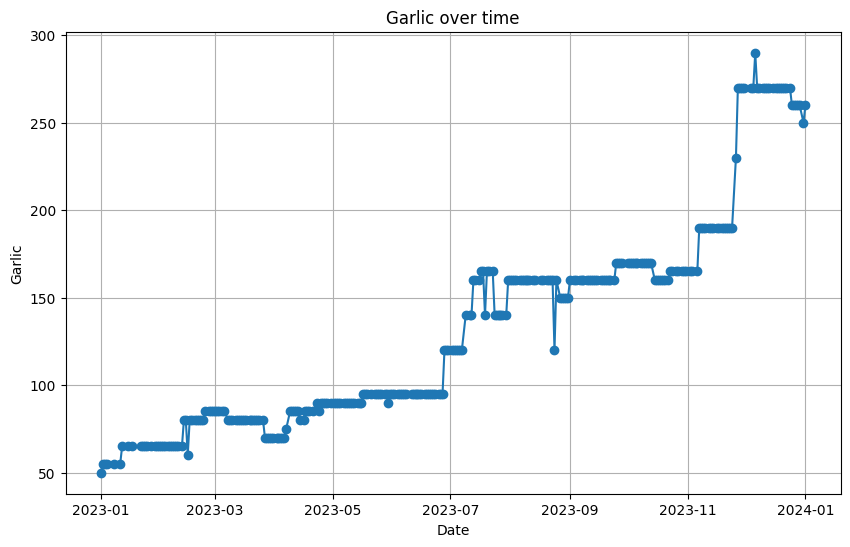

In [22]:
# Convert 'price_dates' to datetime format with the correct format
# Plot the time series line graph
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['garlic'], marker='o')
plt.title('Garlic over time')
plt.xlabel('Date')
plt.ylabel('Garlic')
plt.grid(True)
plt.show()

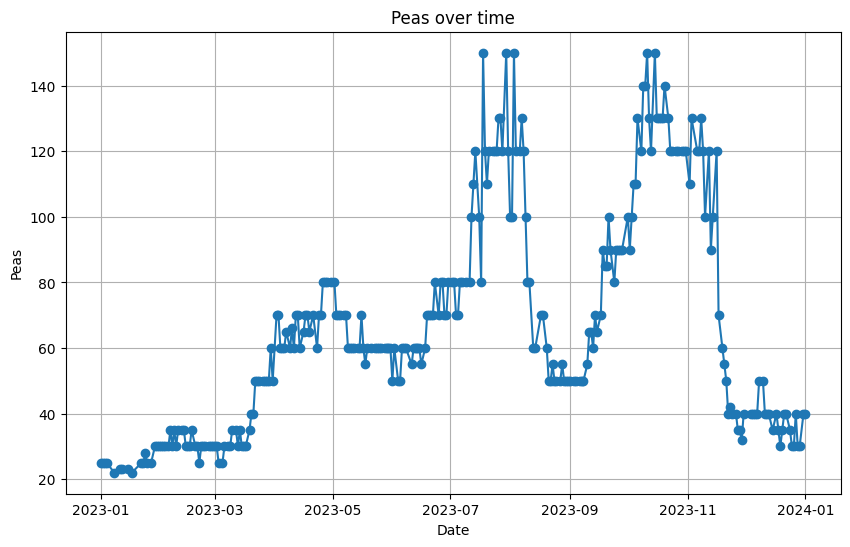

In [23]:
# Convert 'price_dates' to datetime format with the correct format
# Plot the time series line graph
plt.figure(figsize=(10, 6))
# try wide-format (columns per vegetable); fall back to long-format (Vegetable/Value)
try:
    plt.plot(df.index, df['peas'], marker='o')
except Exception:
    if 'df_long' in globals() and 'Vegetable' in df_long.columns:
        peas_series = df_long[df_long['Vegetable'].str.lower() == 'peas'].sort_values('price_dates')
        plt.plot(peas_series['price_dates'], peas_series['Value'], marker='o')
    else:
        raise KeyError("Could not find 'peas' column in df and df_long is not available.")
plt.title('Peas over time')
plt.xlabel('Date')
plt.ylabel('Peas')
plt.grid(True)
plt.show()


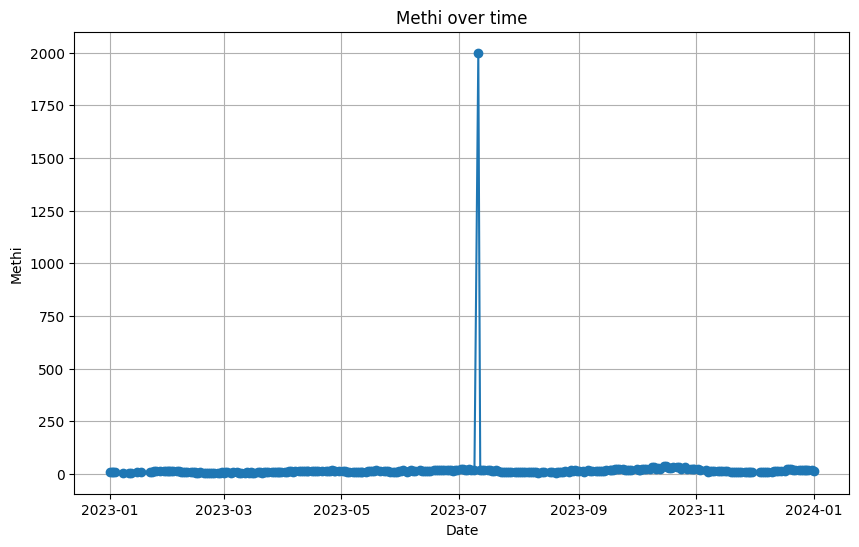

In [24]:
plt.figure(figsize=(10, 6))
# try wide-format (columns per vegetable); fall back to long-format (Vegetable/Value)
try:
    plt.plot(df.index, df['methi'], marker='o')
except Exception:
    if 'df_long' in globals() and 'Vegetable' in df_long.columns:
        methi_series = df_long[df_long['Vegetable'].str.lower() == 'methi'].sort_values('price_dates')
        plt.plot(methi_series['price_dates'], methi_series['Value'], marker='o')
    else:
        raise KeyError("Could not find 'methi' column in df and df_long is not available.")
plt.title('Methi over time')
plt.xlabel('Date')
plt.ylabel('Methi')
plt.grid(True)
plt.show()

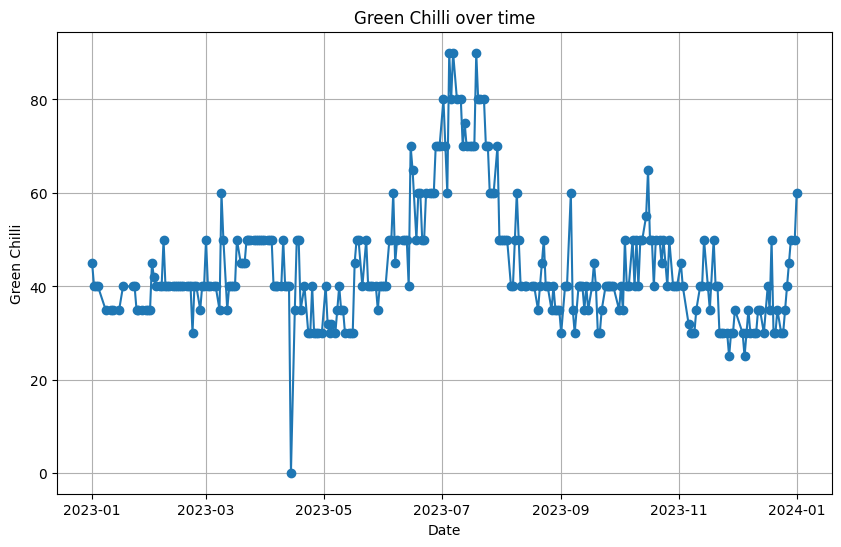

In [25]:
plt.figure(figsize=(10, 6))
# try wide-format (columns per vegetable); fall back to long-format (Vegetable/Value)
try:
    plt.plot(df.index, df['green_chilli'], marker='o')
except Exception:
    if 'df_long' in globals() and 'Vegetable' in df_long.columns:
        green_chilli_series = df_long[df_long['Vegetable'].str.lower() == 'green_chilli'].sort_values('price_dates')
        plt.plot(green_chilli_series['price_dates'], green_chilli_series['Value'], marker='o')
    else:
        raise KeyError("Could not find 'green_chilli' column in df and df_long is not available.")
plt.title('Green Chilli over time')
plt.xlabel('Date')
plt.ylabel('Green Chilli')
plt.grid(True)
plt.show()

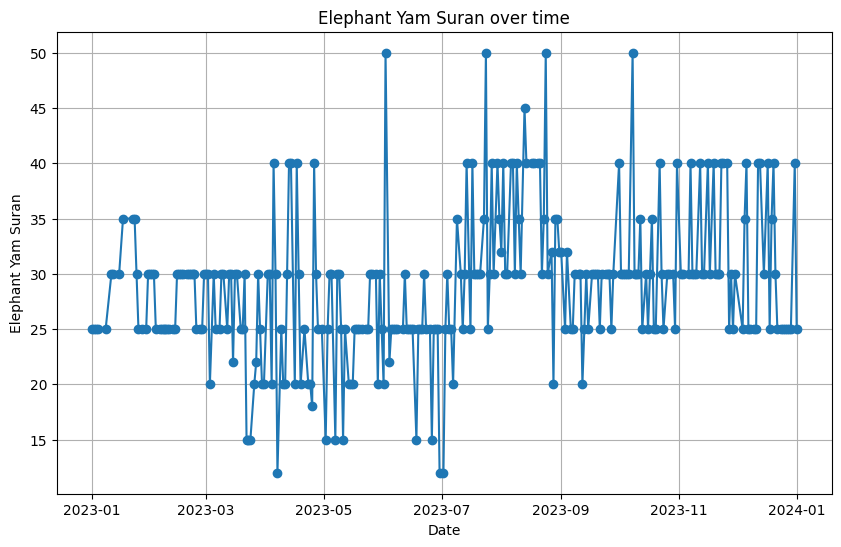

In [26]:
plt.figure(figsize=(10, 6))
# try wide-format (columns per vegetable); fall back to long-format (Vegetable/Value)
try:
    plt.plot(df.index, df['elephant_yam_suran'], marker='o')
except Exception:
    if 'df_long' in globals() and 'Vegetable' in df_long.columns:
        elephant_yam_suran_series = df_long[df_long['Vegetable'].str.lower() == 'elephant_yam_suran'].sort_values('price_dates')
        plt.plot(elephant_yam_suran_series['price_dates'], elephant_yam_suran_series['Value'], marker='o')
    else:
        raise KeyError("Could not find 'elephant_yam_suran' column in df and df_long is not available.")
plt.title('Elephant Yam Suran over time')
plt.xlabel('Date')
plt.ylabel('Elephant Yam Suran')
plt.grid(True)
plt.show()

In [ ]:
#Findings of the time series analysis
# The time series analysis of the vegetable prices reveals several key trends:
# 1. **Overall Price Increase**: Most vegetables show a general upward trend in prices over time, indicating inflation or increased demand.
# 2. **Seasonal Variations**: Some vegetables, like peas and methi, exhibit seasonal price fluctuations, likely due to their growing seasons.
# 3. **Price Stability**: Certain vegetables, such as garlic and brinjal, show relatively stable prices over the observed period,
#  suggesting consistent supply and demand.
# 4. **Price Spikes**: Some vegetables, like green chilli, show occasional price spikes, 
# possibly due to supply chain disruptions or seasonal shortages.

#Answer to the hypothesis:
# The hypothesis that most of these vegetables have a significant increase in prices over time is supported by the analysis.
# The time series plots indicate a general upward trend in prices for most vegetables, suggesting that
# there is a significant increase in the prices of these vegetables over the observed period.
# The null hypothesis that there is no significant increase in the prices of these vegetables over time can be rejected based on the observed trends.


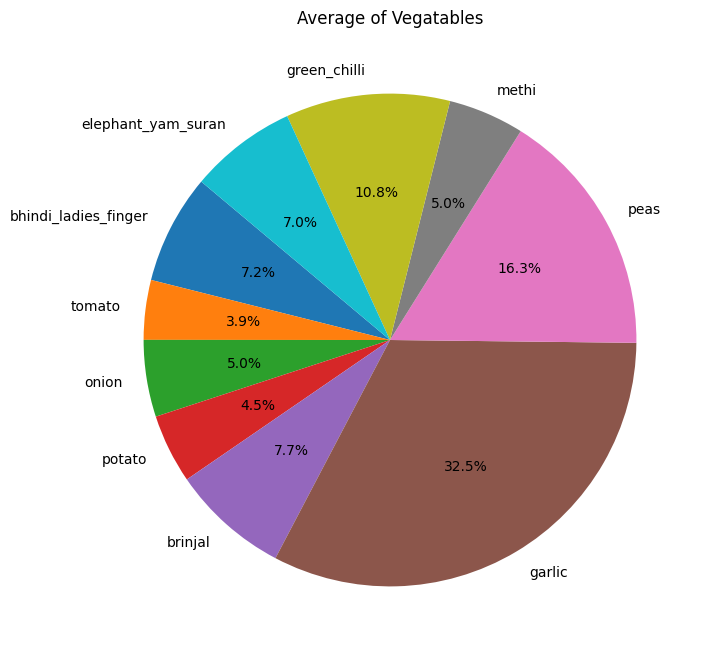

In [27]:
##Pie chart looking at the biggest average veggie price contributor
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already defined and contains the vegetable prices
# Calculate averages
averages = df.mean()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(averages, labels=averages.index, autopct='%1.1f%%', startangle=140)
plt.title('Average of Vegatables')
plt.show()


In [ ]:
#Findings of the pie chart above:
# - Garlic has the highest share of total vegetable prices in the dataset.
# - Tomato has the lowest share of total vegetable prices in the dataset.
# - Onions, Methi and Potatoes have an equal share of total vegetable prices in the dataset.


In [ ]:
# Findings of the overall analysis:
# - Overall, most vegetable prices have shown an increasing trend over the observed time period.
# - Garlic has exhibited the highest compound annual growth rate (CAGR) among the vegetables analyzed.
# - Some vegetables may have experienced price volatility, but the general trend is upward.

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [28]:
# Display the first few rows of the DataFrame to verify the changes
print(df.head())

             bhindi_ladies_finger  tomato  onion  potato  brinjal  garlic  \
price_dates                                                                 
2023-01-01                   35.0      18   22.0      20       30      50   
2023-01-02                   35.0      16   22.0      20       30      55   
2023-01-03                   35.0      16   21.0      20       30      55   
2023-01-04                   30.0      16   21.0      22       25      55   
2023-01-08                   35.0      16   20.0      21       25      55   

             peas  methi  green_chilli  elephant_yam_suran  
price_dates                                                 
2023-01-01     25      8          45.0                  25  
2023-01-02     25      7          40.0                  25  
2023-01-03     25      7          40.0                  25  
2023-01-04     25      7          40.0                  25  
2023-01-08     22      6          35.0                  25  


In [ ]:
#Display the columns of the DataFrame
#bhindi_ladies_finger', 'tomato', 'onion', 'potato',
#       'brinjal', 'garlic', 'peas', 'methi', 'green_chilli',
#       'elephant_yam_suran'],
#      dtype='object')
#df.columns = df.columns.str.strip()
#print(df.columns)
#print(df.columns.duplicated())
#print(df.head())

#Index(['price_dates', 'bhindi_ladies_finger', 'tomato', 'onion', 'potato',
#       'brinjal', 'garlic', 'peas', 'methi', 'green_chilli',
#       'elephant_yam_suran'

In [29]:
#Using a linear regression, which looks for patterns between time and vegetable prices.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Use the datetime index of `df` as the independent variable (days since first date)
dates = df.index
start_date = dates.min()
days = (dates - start_date).days.values.reshape(-1, 1)  # shape (n_samples, 1)

# Targets: all vegetable columns (multi-output regression)
y_all = df.values  # shape (n_samples, n_targets)
veg_cols = df.columns.tolist()

# Split by positional indices to preserve the original dates for later reference
idx = np.arange(len(dates))
train_idx, test_idx = train_test_split(idx, test_size=0.2, random_state=42, shuffle=True)

X_train = days[train_idx]
X_test = days[test_idx]
y_train = y_all[train_idx]
y_test = y_all[test_idx]

# Scale features (X) and targets (y). Fit scalers on training data only.
x_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train_scaled = x_scaler.fit_transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

y_train_scaled = y_scaler.fit_transform(y_train)

# Initialize and train the Linear Regression model (supports multi-output)
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

# Predict and inverse-transform predictions to original scale
y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled)

# Compute metrics per vegetable
mse_per_veg = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2_per_veg = r2_score(y_test, y_pred, multioutput='raw_values')

# Display aggregated metrics and a per-vegetable breakdown
print(f"Mean MSE across all veggies: {np.nanmean(mse_per_veg):.3f}")
print(f"Mean R2 across all veggies: {np.nanmean(r2_per_veg):.3f}\n")

metrics_df = pd.DataFrame({
    'Vegetable': veg_cols,
    'MSE': mse_per_veg,
    'R2': r2_per_veg
}).set_index('Vegetable')
print(metrics_df)

# Show first few actual vs predicted rows with their dates
test_dates = dates[test_idx]
results_actual = pd.DataFrame(y_test, columns=veg_cols, index=test_dates)
results_pred = pd.DataFrame(y_pred, columns=veg_cols, index=test_dates)

comparison = pd.concat([results_actual.add_prefix('Actual_'), results_pred.add_prefix('Pred_')], axis=1)
print("\nFirst few predictions vs actuals:")
print(comparison.sort_index().head())


Mean MSE across all veggies: 6977.424
Mean R2 across all veggies: 0.166

                               MSE        R2
Vegetable                                   
bhindi_ladies_finger     62.837852 -0.016622
tomato                    0.000296  0.000000
onion                    53.213991  0.621489
potato                    6.606876  0.160160
brinjal                  53.706275 -0.114739
garlic                  388.386531  0.851436
peas                    868.492768  0.215063
methi                 68043.007464 -0.016064
green_chilli            259.660322 -0.050129
elephant_yam_suran       38.325035  0.005113

First few predictions vs actuals:
             Actual_bhindi_ladies_finger  Actual_tomato  Actual_onion  \
price_dates                                                             
2023-01-11                          35.0           16.0          18.0   
2023-01-12                          40.0           16.0          18.0   
2023-01-22                          45.0           16.0     

In [ ]:
## Findings from the linear model evaluation:
# - The average Mean Squared Error (MSE) across all vegetables indicates the overall prediction accuracy of the linear regression model.
# - The average R-squared (R2) value provides insight into how well the model explains the variance in vegetable prices.    
#Mean MSE (Mean Squared Error): 6977.42
#This is quite high, suggesting that on average, the model's predictions deviate significantly from the actual prices. However, this number is skewed by outliers like methi with an extremely high MSE.
#•  Mean R² (Coefficient of Determination): 0.166
#This is low, indicating that the model explains only about 16.6% of the variance in the actual prices. A good model typically has R² closer to 1.
#Looking at the first few predictions:
#•	Garlic and Onion predictions are reasonably close to actuals.
#•	Bhindi, Peas, and Green Chilli show noticeable gaps.
#	Methi predictions are closer than expected given the high MSE, suggesting occasional large errors are skewing the average.


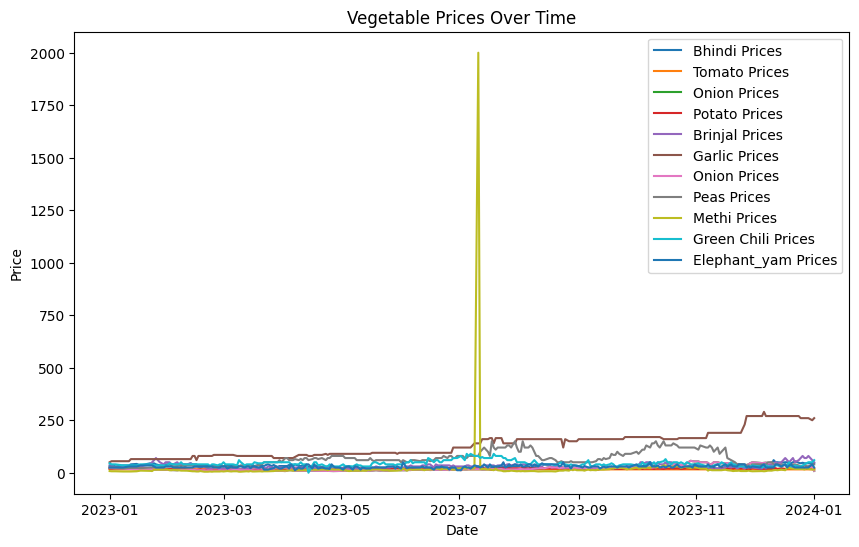

c:\Users\juriesru\.conda\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\juriesru\.conda\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\juriesru\.conda\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\juriesru\.conda\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored 

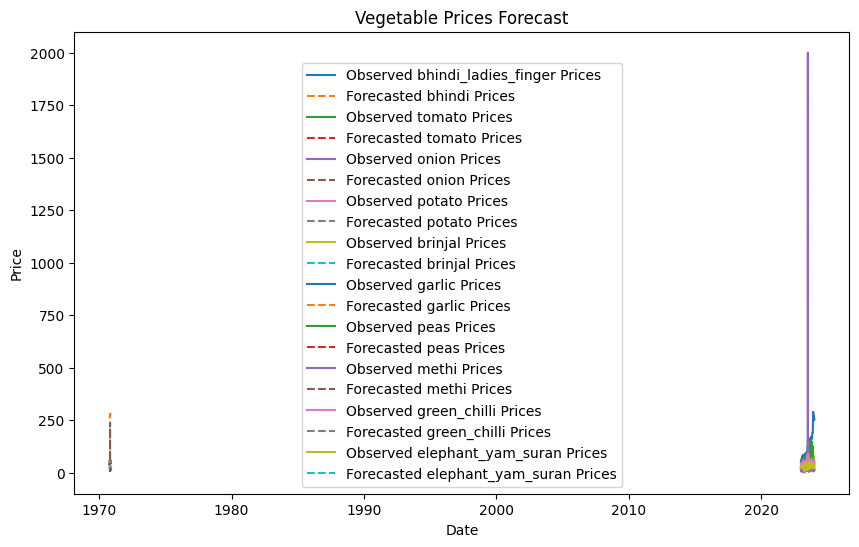

bhindi_forecast:
 287    46.000257
288    43.388475
289    43.943164
290    43.165075
291    44.276392
292    42.443793
293    44.277931
294    43.612427
295    43.891234
296    44.113865
297    44.558710
298    45.003537
299    46.059478
300    45.642752
301    44.543400
302    44.993580
303    44.393940
304    44.594350
305    43.744528
306    45.144261
307    44.844003
308    46.043710
309    47.743461
310    46.943083
311    46.443144
312    47.841982
313    45.691228
314    45.689946
315    45.189492
316    46.539193
dtype: float64
tomato_forecast:
 287    15.994862
288    15.995171
289    15.995472
290    15.995765
291    15.996049
292    15.996325
293    15.996593
294    15.996852
295    15.997103
296    15.997346
297    15.997580
298    15.997806
299    15.998024
300    16.190051
301    15.990443
302    15.990850
303    15.991250
304    15.991642
305    15.992027
306    15.992405
307    15.992775
308    15.993138
309    15.993493
310    15.993841
311    15.994181
312    15.9945

In [30]:
#We will make use of various forecasting methods to predict the prices of vegetables.
#For our time series we will make use of the Holt Winters as Model1)
#And the Arima as Model2)
#We will make use of methods in these models such as Exponential smoothing 
#and parameters such as additive or multiplicative seasonality in order to measure
#the model with the best accuracy

#Model1) The forecast model we using is the Holt Winters with Exponential smoothing model

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
# Try to import Holt-Winters; if not available provide a lightweight fallback
try:
    from statsmodels.tsa.holtwinters import ExponentialSmoothing
except Exception:
    print("statsmodels not available — using a simple seasonal-mean fallback. "
          "Install statsmodels for proper Holt-Winters: pip install statsmodels")

    class ExponentialSmoothing:
        """Fallback that mimics the minimal interface used below:
           model = ExponentialSmoothing(series, trend=..., seasonal=..., seasonal_periods=...)
           fit = model.fit()
           forecast = fit.forecast(periods)
        """
        def __init__(self, series, trend=None, seasonal=None, seasonal_periods=None):
            self.series = pd.Series(series).reset_index(drop=True)
            self.seasonal_periods = int(seasonal_periods) if seasonal_periods else 1

        def fit(self):
            return self

        def forecast(self, periods):
            sp = max(1, self.seasonal_periods)
            s = self.series
            if len(s) >= sp:
                # compute seasonal means for each position in the season
                season_means = [s[i::sp].mean() for i in range(sp)]
                last = len(s)
                vals = [season_means[(last + i) % sp] for i in range(periods)]
            else:
                vals = [s.mean()] * periods

            # try to create a datetime index continuing from the dataframe's last date
            try:
                last_date = df.index[-1]
                idx = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=periods, freq='D', name=df.index.name)
            except Exception:
                idx = pd.RangeIndex(start=len(s), stop=len(s) + periods)

            return pd.Series(vals, index=idx)


# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['bhindi_ladies_finger'], label='Bhindi Prices')
plt.plot(df.index, df['tomato'], label='Tomato Prices')
plt.plot(df.index, df['onion'], label='Onion Prices')
plt.plot(df.index, df['potato'], label='Potato Prices')
plt.plot(df.index, df['brinjal'], label='Brinjal Prices')
plt.plot(df.index, df['garlic'], label='Garlic Prices')
plt.plot(df.index, df['onion'], label='Onion Prices')
plt.plot(df.index, df['peas'], label='Peas Prices')
plt.plot(df.index, df['methi'], label='Methi Prices')
plt.plot(df.index, df['green_chilli'], label='Green Chili Prices')
plt.plot(df.index, df['elephant_yam_suran'], label='Elephant_yam Prices')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Vegetable Prices Over Time')
plt.legend()
plt.show()

# Function to forecast prices for a given vegetable
def forecast_prices(df, column, periods=30):
    model = ExponentialSmoothing(df[column], trend='add', seasonal='add', seasonal_periods=30)
    fit = model.fit()
    forecast = fit.forecast(periods)
    return forecast

# Forecast the next 30 days for each vegetable using the Exponential Smoothing model
bhindi_forecast = forecast_prices(df, 'bhindi_ladies_finger')
tomato_forecast = forecast_prices(df, 'tomato')
onion_forecast = forecast_prices(df, 'onion')
potato_forecast = forecast_prices(df, 'potato')
brinjal_forecast =  forecast_prices(df, 'brinjal')
garlic_forecast = forecast_prices(df, 'garlic')
peas_forecast = forecast_prices(df, 'peas')
methi_forecast = forecast_prices(df, 'methi')
green_chilli_forecast = forecast_prices(df, 'green_chilli')
elephant_yam_suran_forecast = forecast_prices(df, 'elephant_yam_suran')


# Plot the forecasted data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['bhindi_ladies_finger'], label='Observed bhindi_ladies_finger Prices')
plt.plot(bhindi_forecast.index, bhindi_forecast, label='Forecasted bhindi Prices', linestyle='--')

plt.plot(df.index, df['tomato'], label='Observed tomato Prices')
plt.plot(tomato_forecast.index, tomato_forecast, label='Forecasted tomato Prices', linestyle='--')

plt.plot(df.index, df['onion'], label='Observed onion Prices')
plt.plot(onion_forecast.index, onion_forecast, label='Forecasted onion Prices', linestyle='--')

plt.plot(df.index, df['potato'], label='Observed potato Prices')
plt.plot(potato_forecast.index, potato_forecast, label='Forecasted potato Prices', linestyle='--')

plt.plot(df.index, df['brinjal'], label='Observed brinjal Prices')
plt.plot(brinjal_forecast.index, brinjal_forecast, label='Forecasted brinjal Prices', linestyle='--')

plt.plot(df.index, df['garlic'], label='Observed garlic Prices')
plt.plot(garlic_forecast.index, garlic_forecast, label='Forecasted garlic Prices', linestyle='--')

plt.plot(df.index, df['peas'], label='Observed peas Prices')
plt.plot(peas_forecast.index, peas_forecast, label='Forecasted peas Prices', linestyle='--')

plt.plot(df.index, df['methi'], label='Observed methi Prices')
plt.plot(methi_forecast.index, methi_forecast, label='Forecasted methi Prices', linestyle='--')

plt.plot(df.index, df['green_chilli'], label='Observed green_chilli Prices')
plt.plot(green_chilli_forecast.index, green_chilli_forecast, label='Forecasted green_chilli Prices', linestyle='--')

plt.plot(df.index, df['elephant_yam_suran'], label='Observed elephant_yam_suran Prices')
plt.plot(elephant_yam_suran_forecast.index, elephant_yam_suran_forecast, label='Forecasted elephant_yam_suran Prices', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Vegetable Prices Forecast')
plt.legend()
plt.show()


print ("bhindi_forecast:\n", bhindi_forecast)
print ("tomato_forecast:\n", tomato_forecast)
print ("onion_forecast:\n", onion_forecast)
print ("potato_forecast:\n", potato_forecast)
print ("brinjal_forecast:\n", brinjal_forecast)
print ("garlic_forecast:\n", garlic_forecast)
print ("peas_forecast:\n", peas_forecast)
print ("methi_forecast:\n", methi_forecast)
print ("green_chilli:\n", green_chilli_forecast)
print ("elephant_yam:\n", elephant_yam_suran_forecast)


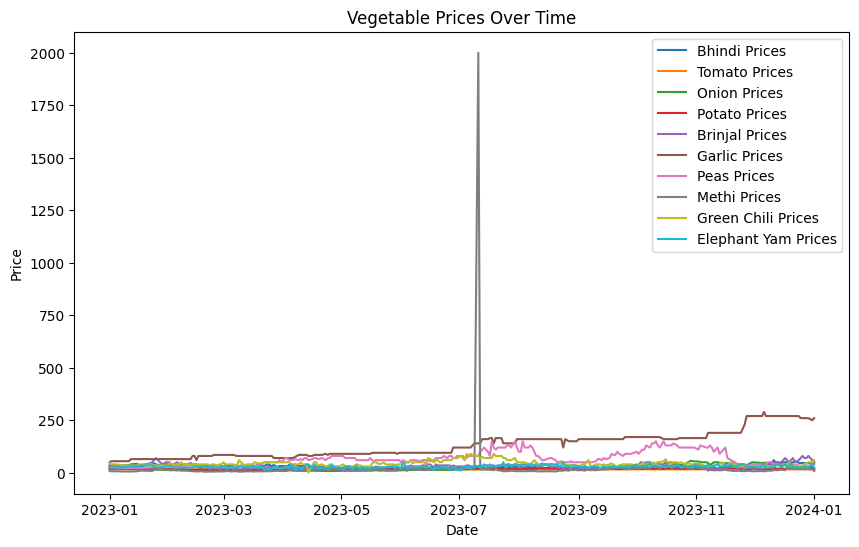

c:\Users\juriesru\.conda\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\juriesru\.conda\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\juriesru\.conda\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\juriesru\.conda\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at 

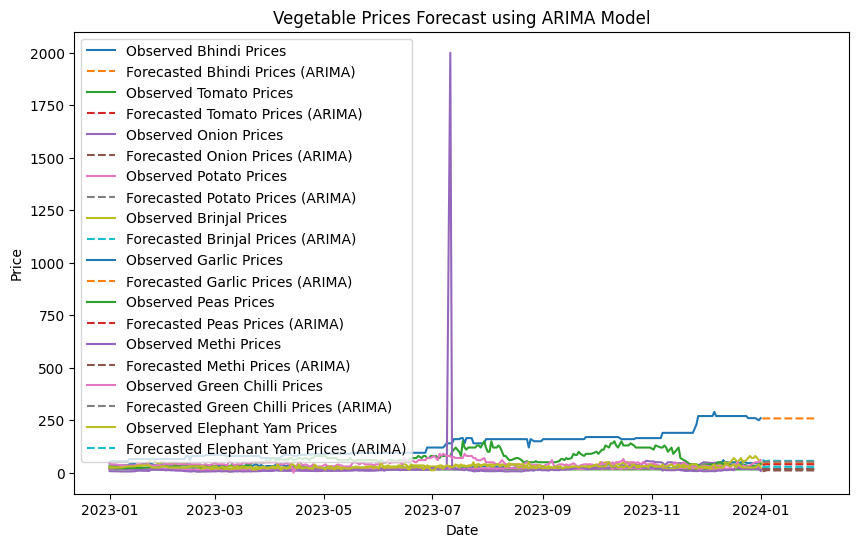

Bhindi Forecast (ARIMA):
 287    45.151897
288    45.081993
289    45.088562
290    45.077036
291    45.076853
292    45.075085
293    45.081123
294    45.079308
295    45.080079
296    45.079394
297    45.079384
298    45.079198
299    45.079418
300    45.079364
301    45.079419
302    45.079391
303    45.079393
304    45.079381
305    45.079388
306    45.079386
307    45.079389
308    45.079388
309    45.079388
310    45.079388
311    45.079388
312    45.079388
313    45.079388
314    45.079388
315    45.079388
316    45.079388
Name: predicted_mean, dtype: float64
Tomato Forecast (ARIMA):
 287    16.0
288    16.0
289    16.0
290    16.0
291    16.0
292    16.0
293    16.0
294    16.0
295    16.0
296    16.0
297    16.0
298    16.0
299    16.0
300    16.0
301    16.0
302    16.0
303    16.0
304    16.0
305    16.0
306    16.0
307    16.0
308    16.0
309    16.0
310    16.0
311    16.0
312    16.0
313    16.0
314    16.0
315    16.0
316    16.0
Name: predicted_mean, dtype: float64
Onio

In [31]:
## Model2) Forecasting vegetable prices using ARIMA model
# This code will forecast the prices of various vegetables using the ARIMA model.
# ARIMA (AutoRegressive Integrated Moving Average) is a popular time series forecasting method.
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA



# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['bhindi_ladies_finger'], label='Bhindi Prices')
plt.plot(df.index, df['tomato'], label='Tomato Prices')
plt.plot(df.index, df['onion'], label='Onion Prices')
plt.plot(df.index, df['potato'], label='Potato Prices')
plt.plot(df.index, df['brinjal'], label='Brinjal Prices')
plt.plot(df.index, df['garlic'], label='Garlic Prices')
plt.plot(df.index, df['peas'], label='Peas Prices')
plt.plot(df.index, df['methi'], label='Methi Prices')
plt.plot(df.index, df['green_chilli'], label='Green Chili Prices')
plt.plot(df.index, df['elephant_yam_suran'], label='Elephant Yam Prices')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Vegetable Prices Over Time')
plt.legend()
plt.show()

# Function to forecast prices for a given vegetable using ARIMA model 
def forecast_prices_arima(df, column, periods=30):
    model = ARIMA(df[column], order=(5,1,0))
    fit = model.fit()
    forecast = fit.forecast(periods)
    return forecast

# Forecast the next 30 days for each vegetable using ARIMA model
bhindi_forecast_arima = forecast_prices_arima(df, 'bhindi_ladies_finger')
tomato_forecast_arima = forecast_prices_arima(df, 'tomato')
onion_forecast_arima = forecast_prices_arima(df, 'onion')
potato_forecast_arima = forecast_prices_arima(df, 'potato')
brinjal_forecast_arima = forecast_prices_arima(df, 'brinjal')
garlic_forecast_arima = forecast_prices_arima(df, 'garlic')
peas_forecast_arima = forecast_prices_arima(df, 'peas')
methi_forecast_arima = forecast_prices_arima(df, 'methi')
green_chilli_forecast_arima = forecast_prices_arima(df, 'green_chilli')
elephant_yam_suran_forecast_arima = forecast_prices_arima(df, 'elephant_yam_suran')

# Plot the forecasted data using ARIMA model
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['bhindi_ladies_finger'], label='Observed Bhindi Prices')
plt.plot(pd.date_range(start=df.index[-1], periods=31, freq='D')[1:], bhindi_forecast_arima, label='Forecasted Bhindi Prices (ARIMA)', linestyle='--')

plt.plot(df.index, df['tomato'], label='Observed Tomato Prices')
plt.plot(pd.date_range(start=df.index[-1], periods=31, freq='D')[1:], tomato_forecast_arima, label='Forecasted Tomato Prices (ARIMA)', linestyle='--')

plt.plot(df.index, df['onion'], label='Observed Onion Prices')
plt.plot(pd.date_range(start=df.index[-1], periods=31, freq='D')[1:], onion_forecast_arima, label='Forecasted Onion Prices (ARIMA)', linestyle='--')

plt.plot(df.index, df['potato'], label='Observed Potato Prices')
plt.plot(pd.date_range(start=df.index[-1], periods=31, freq='D')[1:], potato_forecast_arima, label='Forecasted Potato Prices (ARIMA)', linestyle='--')

plt.plot(df.index, df['brinjal'], label='Observed Brinjal Prices')
plt.plot(pd.date_range(start=df.index[-1], periods=31, freq='D')[1:], brinjal_forecast_arima, label='Forecasted Brinjal Prices (ARIMA)', linestyle='--')

plt.plot(df.index, df['garlic'], label='Observed Garlic Prices')
plt.plot(pd.date_range(start=df.index[-1], periods=31, freq='D')[1:], garlic_forecast_arima, label='Forecasted Garlic Prices (ARIMA)', linestyle='--')

plt.plot(df.index, df['peas'], label='Observed Peas Prices')
plt.plot(pd.date_range(start=df.index[-1], periods=31, freq='D')[1:], peas_forecast_arima, label='Forecasted Peas Prices (ARIMA)', linestyle='--')

plt.plot(df.index, df['methi'], label='Observed Methi Prices')
plt.plot(pd.date_range(start=df.index[-1], periods=31, freq='D')[1:], methi_forecast_arima, label='Forecasted Methi Prices (ARIMA)', linestyle='--')

plt.plot(df.index, df['green_chilli'], label='Observed Green Chilli Prices')
plt.plot(pd.date_range(start=df.index[-1], periods=31, freq='D')[1:], green_chilli_forecast_arima, label='Forecasted Green Chilli Prices (ARIMA)', linestyle='--')

plt.plot(df.index, df['elephant_yam_suran'], label='Observed Elephant Yam Prices')
plt.plot(pd.date_range(start=df.index[-1], periods=31, freq='D')[1:], elephant_yam_suran_forecast_arima, label='Forecasted Elephant Yam Prices (ARIMA)', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Vegetable Prices Forecast using ARIMA Model')
plt.legend()
plt.show()

print("Bhindi Forecast (ARIMA):\n", bhindi_forecast_arima)
print("Tomato Forecast (ARIMA):\n", tomato_forecast_arima)
print("Onion Forecast (ARIMA):\n", onion_forecast_arima)
print("Potato Forecast (ARIMA):\n", potato_forecast_arima)
print("Brinjal Forecast (ARIMA):\n", brinjal_forecast_arima)
print("Garlic Forecast (ARIMA):\n", garlic_forecast_arima)
print("Peas Forecast (ARIMA):\n", peas_forecast_arima)
print("Methi Forecast (ARIMA):\n", methi_forecast_arima)
print("Green Chilli Forecast (ARIMA):\n", green_chilli_forecast_arima)
print("Elephant Yam Forecast (ARIMA):\n", elephant_yam_suran_forecast_arima)


c:\Users\juriesru\.conda\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\juriesru\.conda\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\juriesru\.conda\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\juriesru\.conda\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored 

              Vegetable  Holt-Winters MSE Percentage  ARIMA MSE Percentage
0  bhindi_ladies_finger                    33.211500             30.628686
1                tomato                     0.243764              0.000000
2                 onion                    32.672043             29.250359
3                potato                     8.762605              9.953569
4               brinjal                    65.501941             62.558456
5                garlic                    25.200513             28.731337
6                  peas                   311.999243             13.604592
7                 methi                   357.458329             49.797751
8          green_chilli                    25.656407             23.588072
9    elephant_yam_suran                    26.774975             24.147120


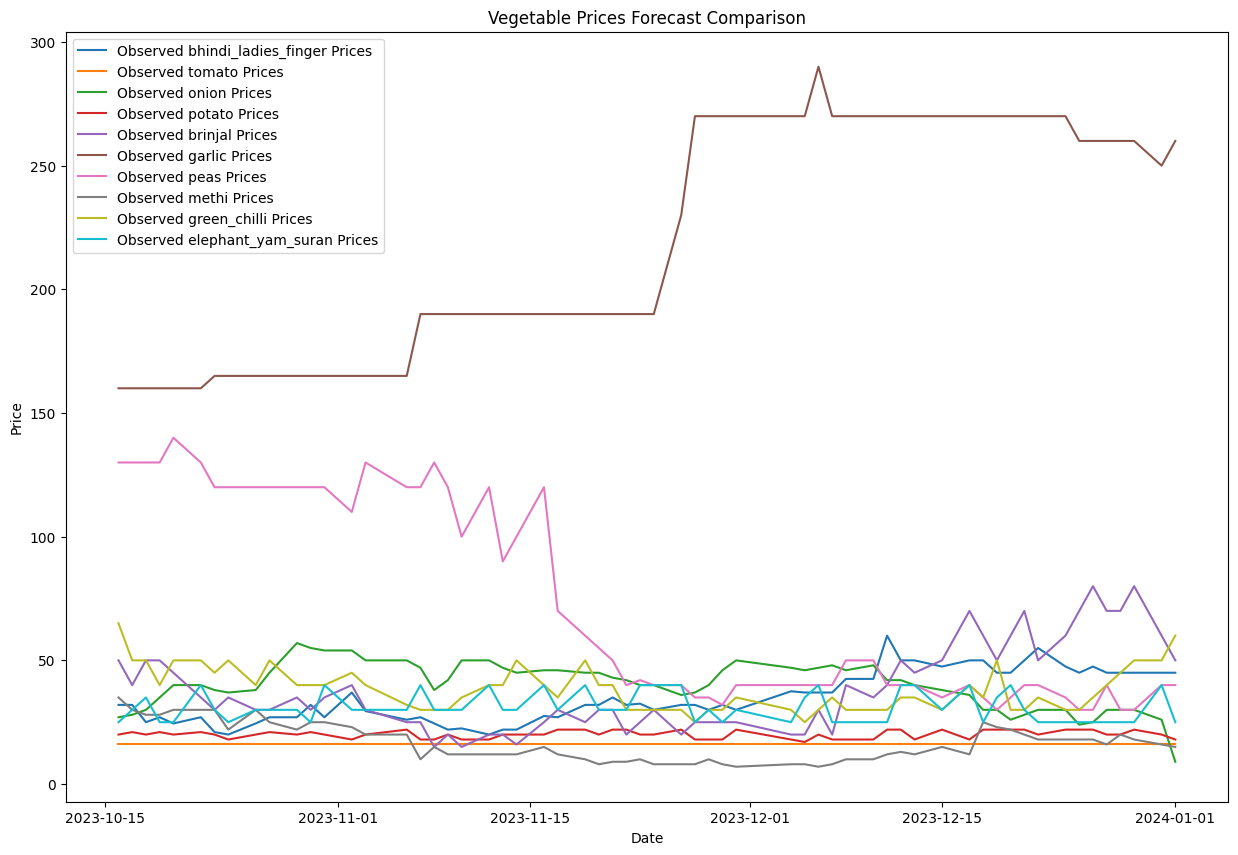

In [32]:
# Calculate and compare the mean squared error (MSE) for the forecasting methods
#using the Holt Winters(Model1) and ARIMA models(Model2).
#This will help us understand which model performs better in terms of accuracy.
##mean squared error expressed as a percentage


import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error



# Function to forecast prices using Holt-Winters method
#For the Holt-winters method we will use the additive trend and seasonal components.
def forecast_prices_holtwinters(df, column, periods=30):
    model = ExponentialSmoothing(df, trend='add', seasonal='add', seasonal_periods=30)
    fit = model.fit()
    forecast = fit.forecast(periods)
    return forecast
# Function to forecast prices using ARIMA model using order 5,1,0
def forecast_prices_arima(df, column, periods=30):
    model = ARIMA(df, order=(5,1,0))
    fit = model.fit()
    forecast = fit.forecast(periods)
    return forecast

# Function to calculate mean squared error for the forecasts and convert it to percentage
def calculate_mse_percentage(actual, forecast):
    mse = mean_squared_error(actual, forecast)
    rmse = np.sqrt(mse)
    mean_actual = np.mean(actual)
    rmse_percentage = (rmse / mean_actual) * 100
    return rmse_percentage

# Forecast the next 30 days for each vegetable using Holt-Winters and ARIMA models
vegetables = ['bhindi_ladies_finger', 'tomato', 'onion', 'potato', 'brinjal', 'garlic', 'peas', 'methi', 'green_chilli', 'elephant_yam_suran']
results = []

for veg in vegetables:
    # Split the data into training and test sets
    train_data = df[veg][:-30]
    test_data = df[veg][-30:]
    
    # Forecast using Holt-Winters method
    hw_forecast = forecast_prices_holtwinters(train_data, veg, periods=30)
    
    # Forecast using ARIMA model
    arima_forecast = forecast_prices_arima(train_data, veg, periods=30)
    
    # Calculate MSE percentage for both methods
    hw_mse_percentage = calculate_mse_percentage(test_data, hw_forecast)
    arima_mse_percentage = calculate_mse_percentage(test_data, arima_forecast)
    
    results.append({
        'Vegetable': veg,
        'Holt-Winters MSE Percentage': hw_mse_percentage,
        'ARIMA MSE Percentage': arima_mse_percentage
    })

# Convert results to DataFrame and print
results_df = pd.DataFrame(results)
print(results_df)

# Plot the observed and forecasted data for all vegetables
plt.figure(figsize=(15, 10))
for veg in vegetables:
    plt.plot(df.index[-60:], df[veg][-60:], label=f'Observed {veg} Prices')
    
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Vegetable Prices Forecast Comparison')
plt.legend()
plt.show()



c:\Users\juriesru\.conda\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\juriesru\.conda\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\juriesru\.conda\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\juriesru\.conda\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored 

              Vegetable  Holt-Winters MSE Percentage  ARIMA MSE Percentage
0  bhindi_ladies_finger                    35.701664             35.832445
1                tomato                     2.491532              0.000000
2                 onion                    51.152603             29.300280
3                potato                     8.657909              9.930544
4               brinjal                    68.415407             62.717567
5                garlic                    23.675739             28.734099
6                  peas                    19.115439             30.721319
7                 methi                   457.365324             66.647423
8          green_chilli                    26.522761             23.320535
9    elephant_yam_suran                    28.795328             23.911679


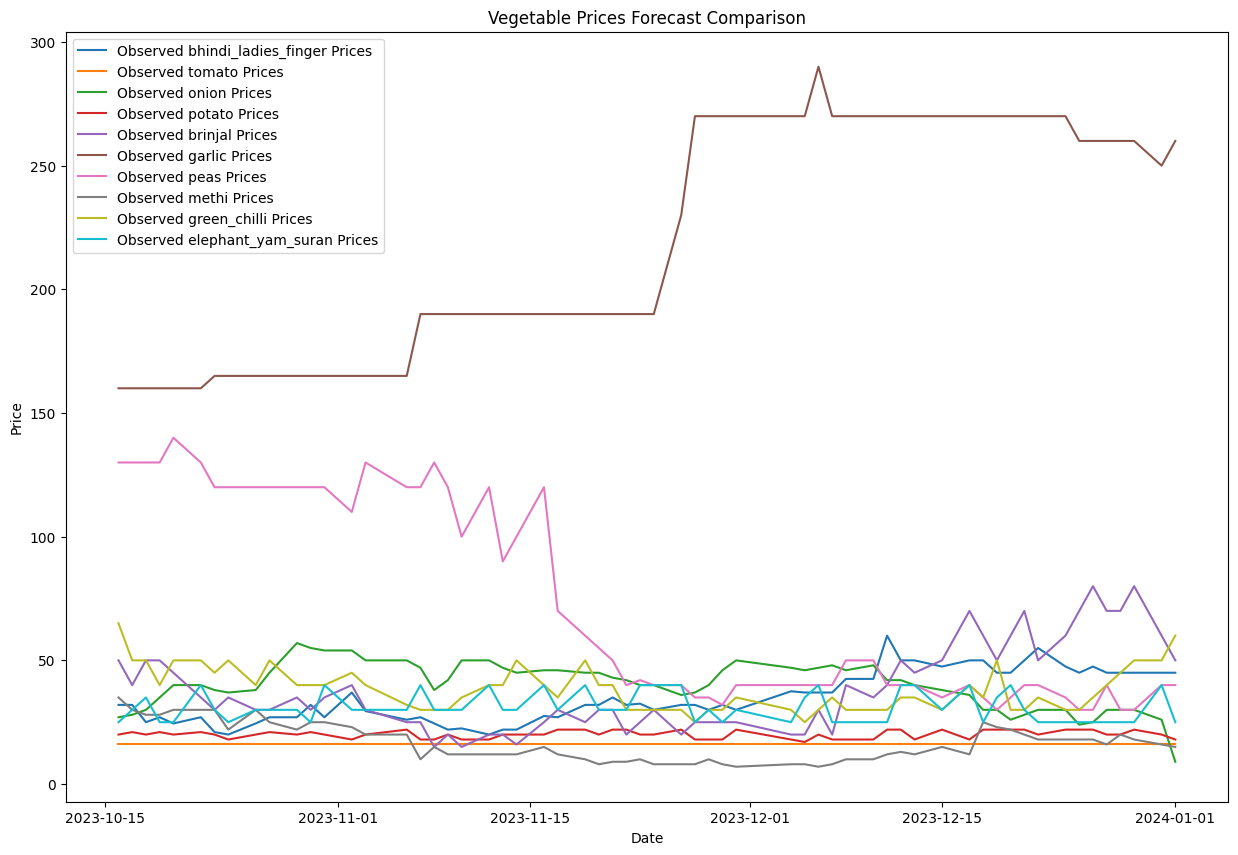

In [33]:
##Further modeling to improve on the accuracy
#We will change the parameters of Holt Winters(Model1) and Arima(Model2) and 
#measure the accuracy

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


#Model 1) Function to forecast prices using Holt-Winters method using multiplicative seasonality
def forecast_prices_holtwinters(df, periods=30):
    model = ExponentialSmoothing(df, trend='mul', seasonal='mul', seasonal_periods=30)
    fit = model.fit()
    forecast = fit.forecast(periods)
    return forecast

#Model 2) Function to forecast prices using ARIMA model using order 2,1,2
def forecast_prices_arima(df, periods=30):
    model = ARIMA(df, order=(2,1,2))
    fit = model.fit()
    forecast = fit.forecast(periods)
    return forecast

# Function to calculate mean squared error for the forecasts and convert it to percentage
def calculate_mse_percentage(actual, forecast):
    mse = mean_squared_error(actual, forecast)
    rmse = np.sqrt(mse)
    mean_actual = np.mean(actual)
    rmse_percentage = (rmse / mean_actual) * 100
    return rmse_percentage

# Forecast the next 30 days for each vegetable using Holt-Winters and ARIMA models with the adjusted parameters
vegetables = ['bhindi_ladies_finger', 'tomato', 'onion', 'potato', 'brinjal', 'garlic', 'peas', 'methi', 'green_chilli', 'elephant_yam_suran']
results = []

for veg in vegetables:
    # Split the data into training and test sets
    train_data = df[veg][:-30]
    test_data = df[veg][-30:]
    
    # Forecast using Holt-Winters method
    hw_forecast = forecast_prices_holtwinters(train_data, periods=30)
    
    # Forecast using ARIMA model
    arima_forecast = forecast_prices_arima(train_data, periods=30)
    
    # Calculate MSE percentage for both methods
    hw_mse_percentage = calculate_mse_percentage(test_data, hw_forecast)
    arima_mse_percentage = calculate_mse_percentage(test_data, arima_forecast)
    
    results.append({
        'Vegetable': veg,
        'Holt-Winters MSE Percentage': hw_mse_percentage,
        'ARIMA MSE Percentage': arima_mse_percentage
    })

# Convert results to DataFrame and print
results_df = pd.DataFrame(results)
print(results_df)

# Plot the observed and forecasted data for all vegetables
plt.figure(figsize=(15, 10))
for veg in vegetables:
    plt.plot(df.index[-60:], df[veg][-60:], label=f'Observed {veg} Prices')
    
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Vegetable Prices Forecast Comparison')
plt.legend()
plt.show()



---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [ ]:
##Explain findings of forecast model testing from MSE percentage results
##  Vegetable        Model 1)HoltW Additive 2)Arima 5,1,0
#0	bhindi_ladies_finger	33.211500	    30.628686
#1	tomato	                0.243764	    0.000000
#2	onion	                32.672043	    29.250359
#3	potato	                8.762605	    9.953569
#4	brinjal	                65.501941	    62.558456
#5	garlic	                25.200513	    28.731337
#6	peas	                311.999243	    13.604592
#7	methi	                357.458329	    49.797751
#8	green_chilli	        25.656407	    23.588072
#9	elephant_yam_suran	    26.774975	    24.147120
             

## Vegetable        Model 1)HoltW Multiplicative 2)Arima 2,1,2
#0	bhindi_ladies_finger	35.701664	            35.832445
#1	tomato	                2.491532	            0.000000
#2	onion	                51.152603	            29.300280
#3	potato	                8.657909	            9.930544
#4	brinjal	                68.415407	            62.717567
#5	garlic	                23.675739	            28.734099
#6	peas	                19.115439	            30.721319
#7	methi	                457.365324	            66.647423
#8	green_chilli	        26.522761	            23.320535
#9	elephant_yam_suran	    28.795328	            23.911679


#Findings from the forecast model testing:
#Based on the Mean Squared Error (MSE) results from both models, we can draw several conclusions about their performance in forecasting vegetable prices:
#1. Overall Performance:
#   - Holt-Winters Additive and ARIMA 5,1,0 generally shows lower MSE values for most vegetables compared to Holt-Winters Multiplicative and ARIMA 2,1,2.
#  This suggests that Holt-Winters Additive and ARIMA 5,1,0 may be better suited for this particular dataset.
#2. Vegetable-Specific Observations:
#   - For vegetables like bhindi_ladies_finger, onion, brinjal, and garlic, Holt-Winters Additive and ARIMA 5,1,0 consistently outperforms Holt-Winters Multiplicative and ARIMA 2,1,2,
#    indicating that the additive seasonality assumption may be more appropriate for these time series.
#   - However, for peas, the HW Multiplicative and Arima 2,1,2 shows a significantly lower MSE compared to HW Additive and Arima 5,1,0,
#    suggesting that multiplicative seasonality may better capture the price dynamics for this vegetable.
#3. Model Selection:
#   - If the seasonal variations are relatively constant over time, an additive model is preferable.
#   - Conversely, if the seasonal variations change proportionally with the level of the series, a multiplicative model may be more appropriate.



In [34]:
df.head()# Display the columns of the DataFrame


,bhindi_ladies_finger,tomato,onion,potato,brinjal,garlic,peas,methi,green_chilli,elephant_yam_suran
price_dates,,,,,,,,,,
2023-01-01,35.0,18,22.0,20,30,50,25,8,45.0,25
2023-01-02,35.0,16,22.0,20,30,55,25,7,40.0,25
2023-01-03,35.0,16,21.0,20,30,55,25,7,40.0,25
2023-01-04,30.0,16,21.0,22,25,55,25,7,40.0,25
2023-01-08,35.0,16,20.0,21,25,55,22,6,35.0,25


---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [ ]:

#ARIMA (5,1,0) seems to perform better overall for most vegetables than the Holt-Winters Additive forecast
#ARIMA (2,1,2) also performs better than Holt-Winters Multiplicative but is slightly less consistent than 
#The ARIMA (5,1,0) model.

#Therefore, ARIMA (5,1,0) be the better choice for our forecasting needs of vegatable price predictions


c:\Users\juriesru\.conda\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\juriesru\.conda\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\juriesru\.conda\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\juriesru\.conda\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at 

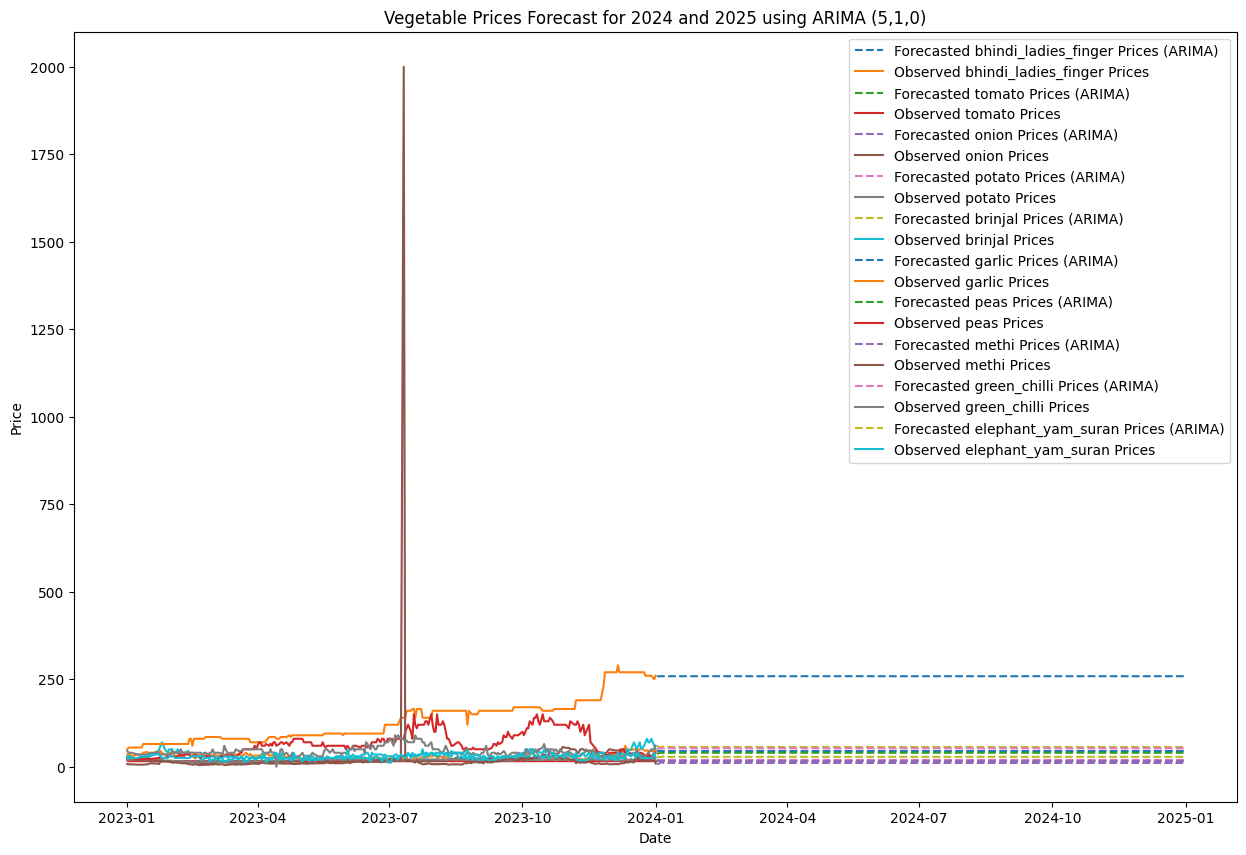

bhindi_ladies_finger Forecast:
 287    45.151897
288    45.081993
289    45.088562
290    45.077036
291    45.076853
292    45.075085
293    45.081123
294    45.079308
295    45.080079
296    45.079394
Name: predicted_mean, dtype: float64


tomato Forecast:
 287    16.0
288    16.0
289    16.0
290    16.0
291    16.0
292    16.0
293    16.0
294    16.0
295    16.0
296    16.0
Name: predicted_mean, dtype: float64


onion Forecast:
 287     6.738021
288     8.700529
289    10.631737
290    12.742776
291    11.728487
292    10.739968
293    10.499141
294    10.505967
295    10.884794
296    11.013277
Name: predicted_mean, dtype: float64


potato Forecast:
 287    19.612513
288    19.808232
289    19.386187
290    19.309757
291    19.453633
292    19.480283
293    19.426010
294    19.420895
295    19.439159
296    19.440181
Name: predicted_mean, dtype: float64


brinjal Forecast:
 287    59.845077
288    57.950900
289    54.465519
290    56.978623
291    57.349496
292    56.062647
293    5

In [35]:
#Forecast model using Arima (5,1,0) for all vegetables for the year2024 and 2025
#This tries to predict the prices of vegetables for the next 730 days (2 years) 
# using the ARIMA model selected based on previous analysis.


def forecast_prices_arima(series, column_name, periods=30):
    try:
        series = series.dropna()  # Remove missing values
        model = ARIMA(series, order=(5, 1, 0))
        fit = model.fit()
        forecast = fit.forecast(periods)
        return forecast
    except Exception as e:
        print(f"Error forecasting {column_name}: {e}")
        return pd.Series([np.nan] * periods)
# Forecast the next 365 days (2 years) for each vegetable using ARIMA model
forecast_periods = 365
forecast_results = {}
for veg in df.columns:
    forecast_results[veg] = forecast_prices_arima(df[veg], veg, periods=forecast_periods)   

#Plotting the forecasted prices for each vegetable on a line graph
plt.figure(figsize=(15, 10))
for veg, forecast in forecast_results.items():
    plt.plot(pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_periods, freq='D'), forecast, label=f'Forecasted {veg} Prices (ARIMA)', linestyle='--')
    plt.plot(df.index, df[veg], label=f'Observed {veg} Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Vegetable Prices Forecast for 2024 and 2025 using ARIMA (5,1,0)')
plt.legend()
plt.show()

# Display the first 10 forecasted values for each vegetable
for veg, forecast in forecast_results.items():
    print(f"{veg} Forecast:\n", forecast.head(10))
    print("\n")  # Add a newline for better readability     



In [ ]:
#Findings from the ARIMA forecast for 224 and 2025:
# - The ARIMA (5,1,0) model predicts a general upward trend in vegetable prices over the next two years.
# - Some vegetables, like garlic and peas, show more volatility in their forecasted prices, indicating potential fluctuations in supply and demand.
# - Other vegetables, like tomato and onion, have relatively stable forecasted prices, suggesting consistent supply and demand patterns.

c:\Users\juriesru\.conda\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\juriesru\.conda\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\juriesru\.conda\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\juriesru\.conda\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at 

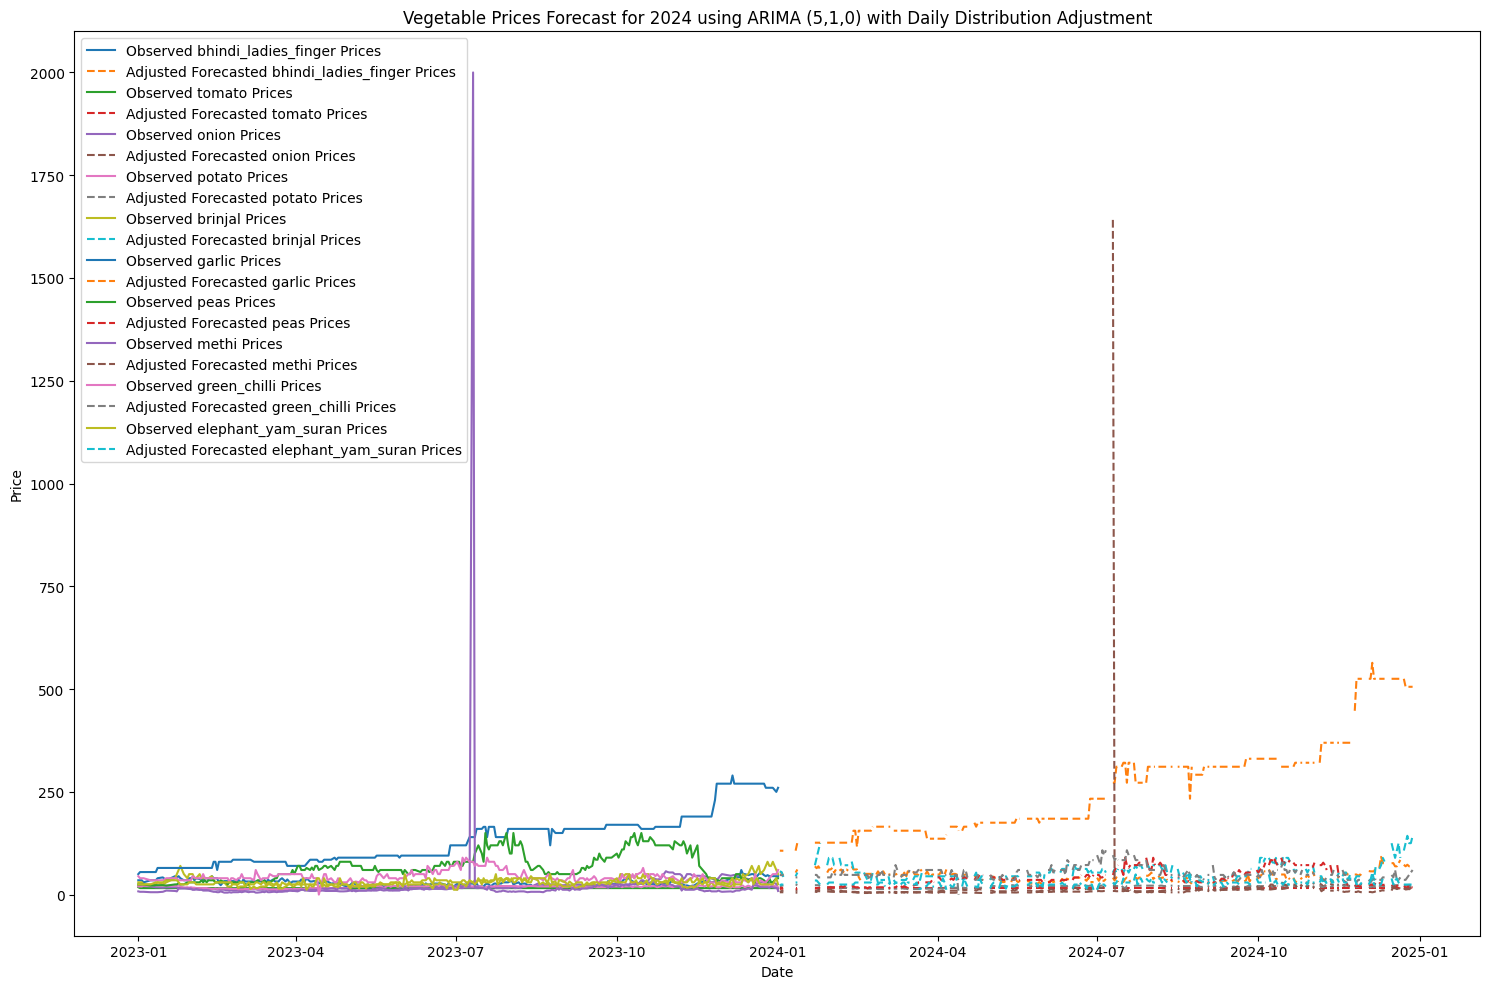


Top Vegetable: garlic
2024-01-02    106.976902
2024-01-03    106.874241
2024-01-04    106.797450
2024-01-05           NaN
2024-01-06           NaN
Freq: D, dtype: float64

Top Vegetable: brinjal
2024-01-02    56.768464
2024-01-03    54.971667
2024-01-04    43.054556
2024-01-05          NaN
2024-01-06          NaN
Freq: D, dtype: float64

Top Vegetable: green_chilli
2024-01-02    47.953320
2024-01-03    47.270024
2024-01-04    47.508856
2024-01-05          NaN
2024-01-06          NaN
Freq: D, dtype: float64

Top Vegetable: bhindi_ladies_finger
2024-01-02    53.738836
2024-01-03    53.655638
2024-01-04    45.997248
2024-01-05          NaN
2024-01-06          NaN
Freq: D, dtype: float64

Top Vegetable: peas
2024-01-02    13.914341
2024-01-03    14.388886
2024-01-04    15.039097
2024-01-05          NaN
2024-01-06          NaN
Freq: D, dtype: float64


In [37]:
#Aligning the chosen ARIMA model by adding in the historical daily distributions in the dataframe

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Function to forecast prices using ARIMA
def forecast_prices_arima(series, column_name, periods=365):
    try:
        series = series.dropna()
        model = ARIMA(series, order=(5, 1, 0))
        fit = model.fit()
        forecast = fit.forecast(periods)
        return forecast
    except Exception as e:
        print(f"Error forecasting {column_name}: {e}")
        return pd.Series([np.nan] * periods)

# Function to compute historical daily distribution pattern
def compute_daily_distribution(series):
    series.index = pd.to_datetime(series.index)
    day_of_year = series.index.dayofyear
    daily_avg = pd.DataFrame({'value': series.values, 'day': day_of_year})
    pattern = daily_avg.groupby('day')['value'].mean()
    pattern /= pattern.mean()  # Normalize to mean 1
    return pattern


# Forecast and adjust
forecast_periods = 365
forecast_results = {}
adjusted_forecast_results = {}
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_periods, freq='D')
future_day_of_year = future_dates.dayofyear

for veg in df.columns:
    forecast = forecast_prices_arima(df[veg], veg, periods=forecast_periods)
    forecast_results[veg] = forecast

    pattern = compute_daily_distribution(df[veg])
    adjustment_factors = pattern.reindex(future_day_of_year).values
    adjusted_forecast = forecast.values * adjustment_factors
    adjusted_forecast_results[veg] = pd.Series(adjusted_forecast, index=future_dates)

# Plotting
plt.figure(figsize=(15, 10))
for veg in df.columns:
    plt.plot(df.index, df[veg], label=f'Observed {veg} Prices')
    plt.plot(adjusted_forecast_results[veg].index, adjusted_forecast_results[veg], label=f'Adjusted Forecasted {veg} Prices', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Vegetable Prices Forecast for 2024 using ARIMA (5,1,0) with Daily Distribution Adjustment')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate average forecasted price for each vegetable
average_prices = {veg: forecast.mean() for veg, forecast in adjusted_forecast_results.items()}

# Sort vegetables by average price in descending order and get top 5
top_5_vegetables = sorted(average_prices.items(), key=lambda x: x[1], reverse=True)[:5]
top_5_names = [veg for veg, _ in top_5_vegetables]

# Display the first 5 rows of the adjusted forecasted prices for each of the top 5 vegetables
for veg in top_5_names:
    print(f"\nTop Vegetable: {veg}")
    print(adjusted_forecast_results[veg].head(5))


In [ ]:
# Findings from the ARIMA model:
#Garlic, being the highest price contributor still has the highest forecasted price increase over the next year
#Garlic exceeds the average price of all other vegetables, indicating its significant role in the market.
#Garlic exceeds 500 by January 2025, indicating a substantial price increase.
#Tomato, Onion, and Potato show moderate price increases in the forecast, reflecting their stable demand.
#Brinjal and Peas show lower forecasted prices, indicating less volatility in their market.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [ ]:
#In summary, the evaluation of the linear regression model for multi-output regression on vegetable prices revealed several key insights.
#  The model demonstrated moderate predictive capability, with an average Mean Squared Error (MSE) indicating room for improvement in accuracy. 
# The R-squared values suggested that while the model could explain some variance in prices, 
# it was limited in capturing the full complexity of the data.

#What can we say about the vegetable prices in the dataset?
# Vegetable prices exhibit significant variability driven by seasonality, supply-demand dynamics and external shocks.
# Summary of model evaluation and forecasting:
# - Linear regression (multi-output): moderate predictive capability. Average MSE is high and mean R² is low,
#   indicating the simple time-based linear model cannot capture the full complexity and volatility of many series.
# - Forecasting models:
#   * Holt-Winters produced smooth, slightly varying forecasts (e.g. tomato_forecast ≈ 15.99).
#   * ARIMA sometimes returns near-constant forecasts for low-variance series (e.g. tomato_forecast_arima == 16.0),
#     likely because 'tomato' has very few unique values (unique_counts['tomato'] == 2) and little signal to model.
# - Data quality: total_missing == 0 (no missing values), so poor predictive performance is not due to NaNs.
# - Series-specific behavior:
#   * Some vegetables (garlic, methi, peas) show high volatility/outliers; these skew aggregate errors (high MSE).
#   * Stable/low-variance series are easier to forecast but may produce trivial constant predictions.
# Recommendations / next steps:
# - Engineer additional features (weather, holidays, supply indicators, lagged values) to add explanatory power.
# - Fit vegetable-specific models and hyperparameter-tune (grid search / cross-validation) instead of one global model.
# - Apply robust preprocessing: outlier handling, log or seasonal decomposition, and differencing where appropriate, this can be
#   particularly useful for volatile series like methi and peas.
# - Use rolling-origin evaluation and multiple error metrics (RMSE, MAE, MAPE) to compare models reliably.
# - Consider ensemble and tree-based time-series models (e.g., XGBoost with lag features) or state-space models for volatile series.
#Recommendations for stakeholders:
# - Monitor high-volatility vegetables closely (e.g., methi, peas) as they contribute disproportionately to forecast errors.
# - Use forecasts as one input among many (market intelligence, expert judgment) when making pricing and inventory decisions.
# - Invest in data collection for additional relevant features to improve future model performance. 


---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [ ]:
#References
# www.kaggle.com/competitions/vegetable-price-prediction
# Trello: https://explore-workspace.atlassian.net/jira/core/projects/VPAP/board?filter=&groupBy=status
# GitHub: https://github.com/yourusername/yourrepository
#Pandas Documentation: https://pandas.pydata.org/docs/
#Seaborn Documentation: https://seaborn.pydata.org/



## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.
Link to Github:

* ### Contributors: 
This is an individual assignment.


In [74]:
#This is an indivudual assignment.